In [61]:
import os
from google.colab import drive

In [62]:
# Kết nối Google Drive
print("Connecting to Google Drive...")
drive.mount('/content/drive')

Connecting to Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
# --- Đường dẫn các file zip trên Google Drive của bạn ---
# THAY THẾ CÁC ĐƯỜNG DẪN NÀY NẾU KHÁC!
yolo_zip_path = '/content/drive/MyDrive/yolo_dataset.zip'
rcnn_zip_path = '/content/drive/MyDrive/rcnn_dataset.zip'

# --- Thư mục đích trong Colab để giải nén ---
# Chúng ta sẽ giải nén mỗi zip vào một thư mục riêng biệt
yolo_extract_base = '/content/yolo_temp_extract'
rcnn_extract_base = '/content/rcnn_temp_extract'

os.makedirs(yolo_extract_base, exist_ok=True)
os.makedirs(rcnn_extract_base, exist_ok=True)

print(f"\nExtracting YOLO dataset from {yolo_zip_path} to {yolo_extract_base}...")
!unzip -o "{yolo_zip_path}" -d "{yolo_extract_base}"
print("YOLO dataset extraction complete.")

print(f"\nExtracting R-CNN dataset from {rcnn_zip_path} to {rcnn_extract_base}...")
!unzip -o "{rcnn_zip_path}" -d "{rcnn_extract_base}"
print("R-CNN dataset extraction complete.")


Extracting YOLO dataset from /content/drive/MyDrive/yolo_dataset.zip to /content/yolo_temp_extract...
Archive:  /content/drive/MyDrive/yolo_dataset.zip
  inflating: /content/yolo_temp_extract/yolo_dataset/classes.txt  
  inflating: /content/yolo_temp_extract/yolo_dataset/images/00 (106).jpg  
  inflating: /content/yolo_temp_extract/yolo_dataset/images/00 (107).jpg  
  inflating: /content/yolo_temp_extract/yolo_dataset/images/00 (110).jpg  
  inflating: /content/yolo_temp_extract/yolo_dataset/images/00 (111).jpg  
  inflating: /content/yolo_temp_extract/yolo_dataset/images/00 (112).jpg  
  inflating: /content/yolo_temp_extract/yolo_dataset/images/00 (113).jpg  
  inflating: /content/yolo_temp_extract/yolo_dataset/images/00 (114).jpg  
  inflating: /content/yolo_temp_extract/yolo_dataset/images/00 (115).jpg  
  inflating: /content/yolo_temp_extract/yolo_dataset/images/00 (116).jpg  
  inflating: /content/yolo_temp_extract/yolo_dataset/images/00 (117).jpg  
  inflating: /content/yolo_tem

In [64]:
# --- Cập nhật đường dẫn gốc cho Dataset (quan trọng) ---
# Dựa trên output của bạn, chúng giải nén thành thư mục con có tên yolo_dataset và RCNN_dataset
YOLO_CUSTOM_DATASET_ROOT = os.path.join(yolo_extract_base, 'yolo_dataset')
RCNN_CUSTOM_DATASET_ROOT = os.path.join(rcnn_extract_base, 'rcnn_dataset')

In [5]:
# Cài đặt Ultralytics
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 101.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 65.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [6]:
# Import YOLO model
from ultralytics import YOLO
import json

# Tải mô hình YOLOv8n pre-trained (hoặc yolov8x.pt nếu bạn muốn dùng bản lớn hơn và có GPU mạnh)
print("Loading YOLOv8n pre-trained model...")
yolov8_model = YOLO('yolov8n.pt') # Bạn có thể thay bằng 'yolov8x.pt'
print("YOLOv8 model loaded successfully.")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Loading YOLOv8n pre-trained model...


100%|██████████| 6.25M/6.25M [00:00<00:00, 16.5MB/s]


YOLOv8 model loaded successfully.


In [38]:
# Lưu trữ các biến đường dẫn và lớp để dùng ở cell sau
global YOLO_CUSTOM_DATASET_ROOT, RCNN_CUSTOM_DATASET_ROOT

In [8]:
# --- ĐẢM BẢO DANH SÁCH LỚP NÀY CHỈ CHỨA CHÍNH XÁC CÁC LỚP BẠN MUỐN ĐÁNH GIÁ ---
# Bỏ qua việc đọc từ classes.txt để tránh nhầm lẫn và chỉ định trực tiếp danh sách lớp của bạn.
# CHỖ NÀY CẦN SỬA: BỎ LỚP 'auto' KHỎI DANH SÁCH
custom_classes = [
    'bicycle', 'bus', 'car', 'motorcycle', 'parking meter',
    'person', 'traffic light', 'truck'
]
print(f"Custom classes used for evaluation: {custom_classes}")

# --- Lấy chỉ số các lớp để đánh giá ---
# Chúng ta giả định rằng thứ tự các lớp trong custom_classes TƯƠNG ỨNG với ID từ 0 đến n-1 trong file nhãn YOLO.
class_ids_to_evaluate = list(range(len(custom_classes)))
print(f"Evaluating only classes with IDs: {class_ids_to_evaluate} corresponding to: {custom_classes}")


# --- Tạo file dataset.yaml cho YOLOv8 ---
yolo_custom_yaml_path = os.path.join(YOLO_CUSTOM_DATASET_ROOT, 'custom_traffic_eval.yaml')

yaml_content_yolo_custom = f"""
# Đường dẫn gốc của dataset tùy chỉnh của bạn
path: {YOLO_CUSTOM_DATASET_ROOT}

# Đường dẫn tương đối đến thư mục train và val từ 'path'
train: images
val: images

# Số lượng lớp
nc: {len(custom_classes)}

# Tên các lớp (đảm bảo thứ tự khớp với ID trong file .txt của bạn)
names: {custom_classes}
"""
with open(yolo_custom_yaml_path, 'w') as f:
    f.write(yaml_content_yolo_custom)
print(f"YOLOv8 custom dataset config file saved at: {yolo_custom_yaml_path}")


Custom classes used for evaluation: ['bicycle', 'bus', 'car', 'motorcycle', 'parking meter', 'person', 'traffic light', 'truck']
Evaluating only classes with IDs: [0, 1, 2, 3, 4, 5, 6, 7] corresponding to: ['bicycle', 'bus', 'car', 'motorcycle', 'parking meter', 'person', 'traffic light', 'truck']
YOLOv8 custom dataset config file saved at: /content/yolo_temp_extract/yolo_dataset/custom_traffic_eval.yaml


In [9]:
# --- Chạy đánh giá mô hình YOLOv8 chỉ trên các lớp tùy chỉnh của bạn ---
print("\n--- Running YOLOv8 pre-trained model evaluation on YOUR SPECIFIC CUSTOM CLASSES ---")
try:
    # yolo_model đã được tải ở Cell 1
    # THAM SỐ 'classes' Ở ĐÂY ĐỂ CHỌN LỌC CÁC LỚP ĐƯỢC ĐÁNH GIÁ TỪ YAML
    yolov8_metrics = yolov8_model.val(data=yolo_custom_yaml_path, classes=class_ids_to_evaluate)

    # In ra các chỉ số mAP
    print("\n--- YOLOv8 Evaluation Results on Custom Dataset (Filtered by your classes) ---")
    print(f"mAP@0.5 (Pascal VOC metric): {yolov8_metrics.box.map50:.4f}")
    print(f"mAP@0.5:0.95 (COCO metric): {yolov8_metrics.box.map:.4f}")

    # --- THÊM PHẦN NÀY ĐỂ IN RA PRECISION VÀ RECALL ---
    print(f"Precision (overall): {yolov8_metrics.box.p.mean():.4f}") # Trung bình Precision trên các lớp
    print(f"Recall (overall): {yolov8_metrics.box.r.mean():.4f}")    # Trung bình Recall trên các lớp
    # ----------------------------------------------------

    print("\nDetailed results for YOLOv8 (Filtered):")
    # Kiểm tra kỹ output này, nó chỉ nên hiển thị các lớp bạn đã định nghĩa trong custom_classes
    print(yolov8_metrics.results_dict)

    print("\nEvaluation complete. Results saved to runs/detect/valX (where X is a number).")

except Exception as e:
    print(f"An error occurred during YOLOv8 evaluation: {e}")
    print("Please ensure your dataset path, labels, and class names in the YAML file are correct.")
    print("Also, verify that 'classes.txt' contains the correct class names in order.")


--- Running YOLOv8 pre-trained model evaluation on YOUR SPECIFIC CUSTOM CLASSES ---
Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 3.40MB/s]

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 63.6±57.2 MB/s, size: 128.2 KB)



val: Scanning /content/yolo_temp_extract/yolo_dataset/labels... 92 images, 0 backgrounds, 0 corrupt: 100%|██████████| 92/92 [00:00<00:00, 255.90it/s]

val: New cache created: /content/yolo_temp_extract/yolo_dataset/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:27<00:00,  4.56s/it]


                   all         92       1303      0.485      0.185       0.18      0.111
                person         19         31     0.0205      0.161      0.011     0.0021
               bicycle         55         94          0          0          0          0
                   car         79        728      0.803      0.624      0.693       0.47
            motorcycle         28         68      0.629      0.309      0.375      0.186
              airplane          1          1          1          0          0          0
                   bus         61        277          0          0    0.00106   0.000527
                 train         11         11          1          0          0          0
                 truck         35         93      0.431       0.39      0.362       0.23
Speed: 6.7ms preprocess, 246.1ms inference, 0.0ms loss, 4.8ms postprocess per image
Results saved to runs/detect/val

--- YOLOv8 Evaluation Results on Custom Dataset (Filtered by your classes) ---
mA


--- Comparing YOLOv8 predictions with Ground Truth for 10 sample images ---

--- Comparison for 00 (179).jpg ---


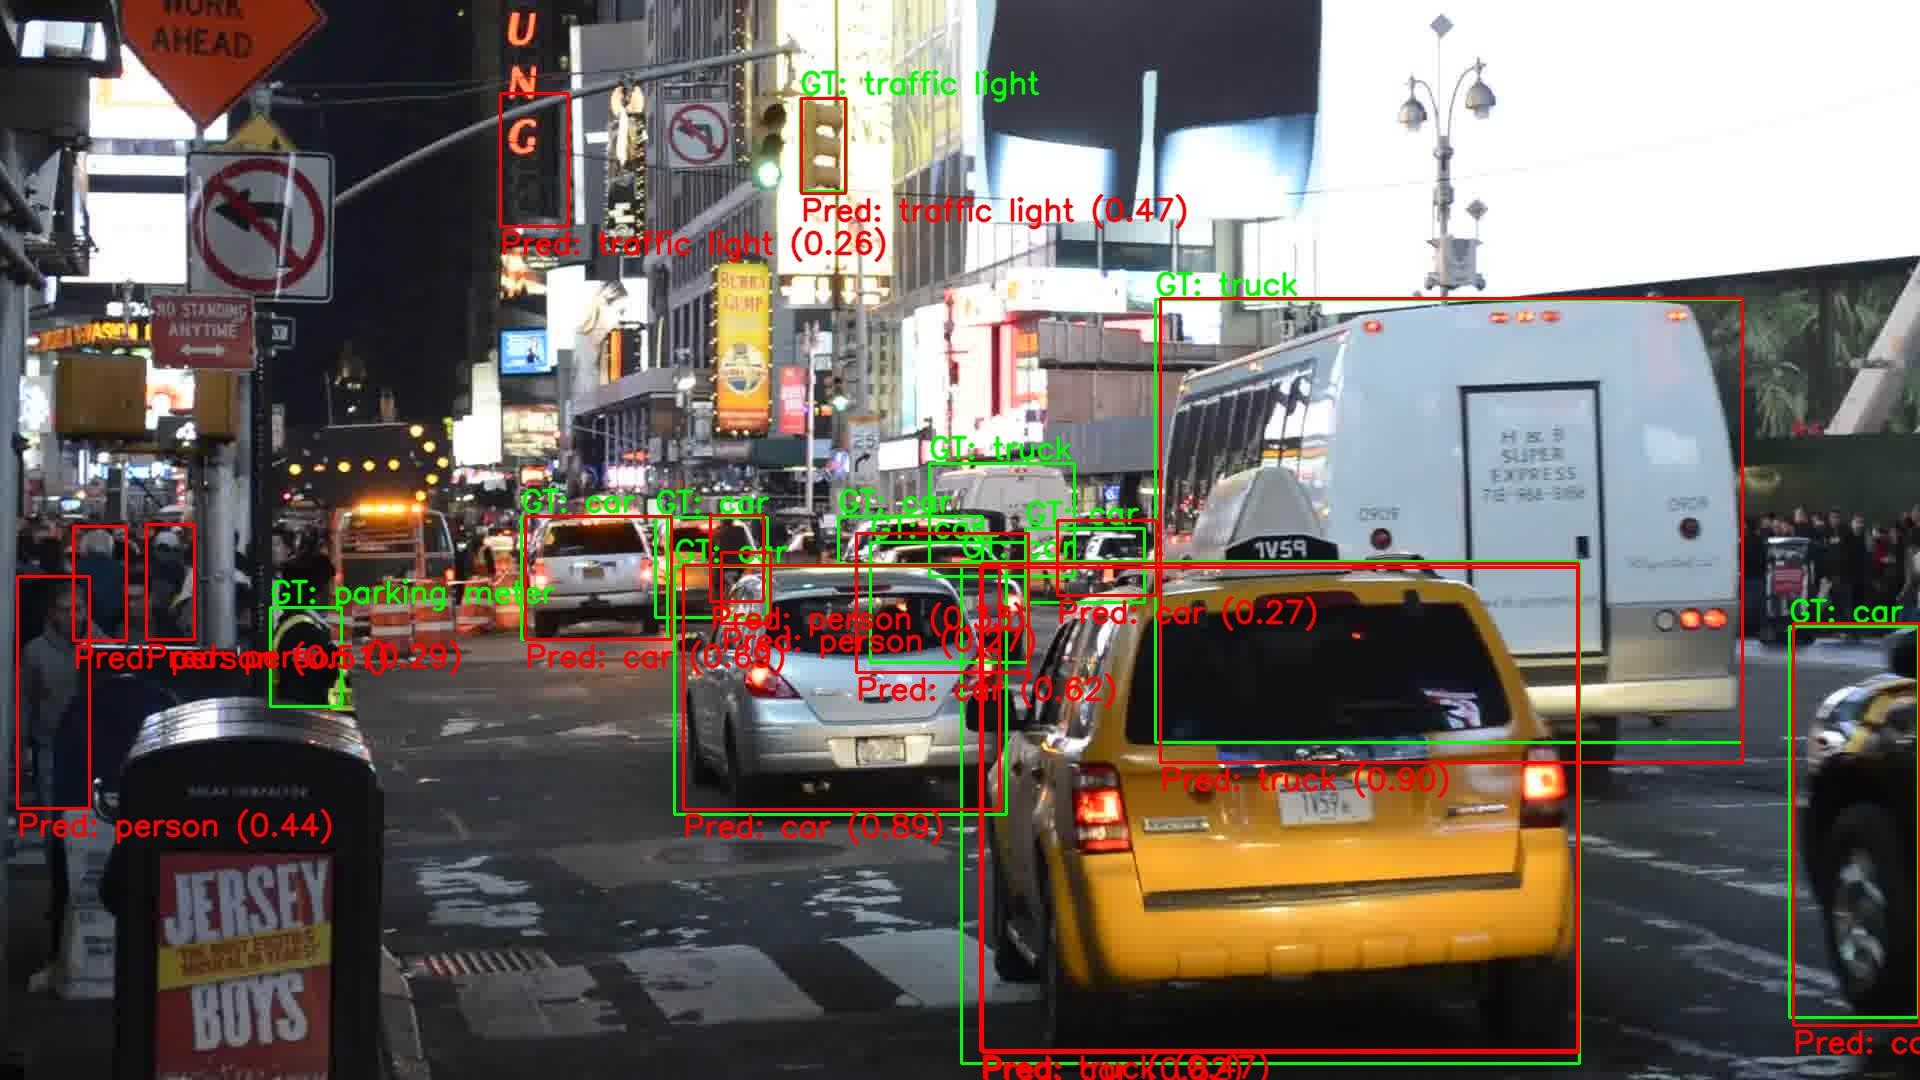


--- Comparison for 00 (802).jpg ---


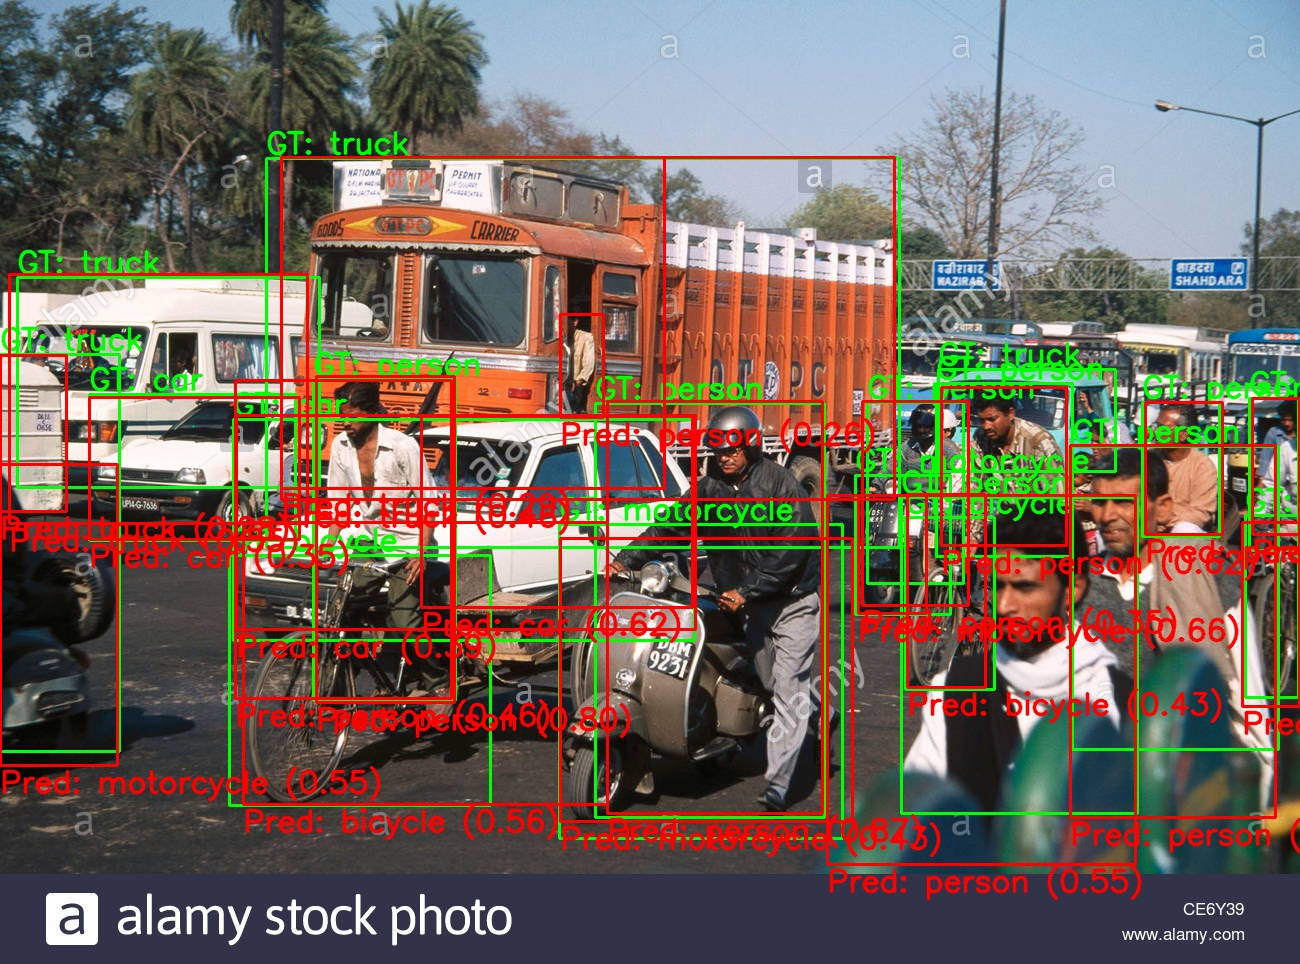


--- Comparison for 00 (84).jpg ---


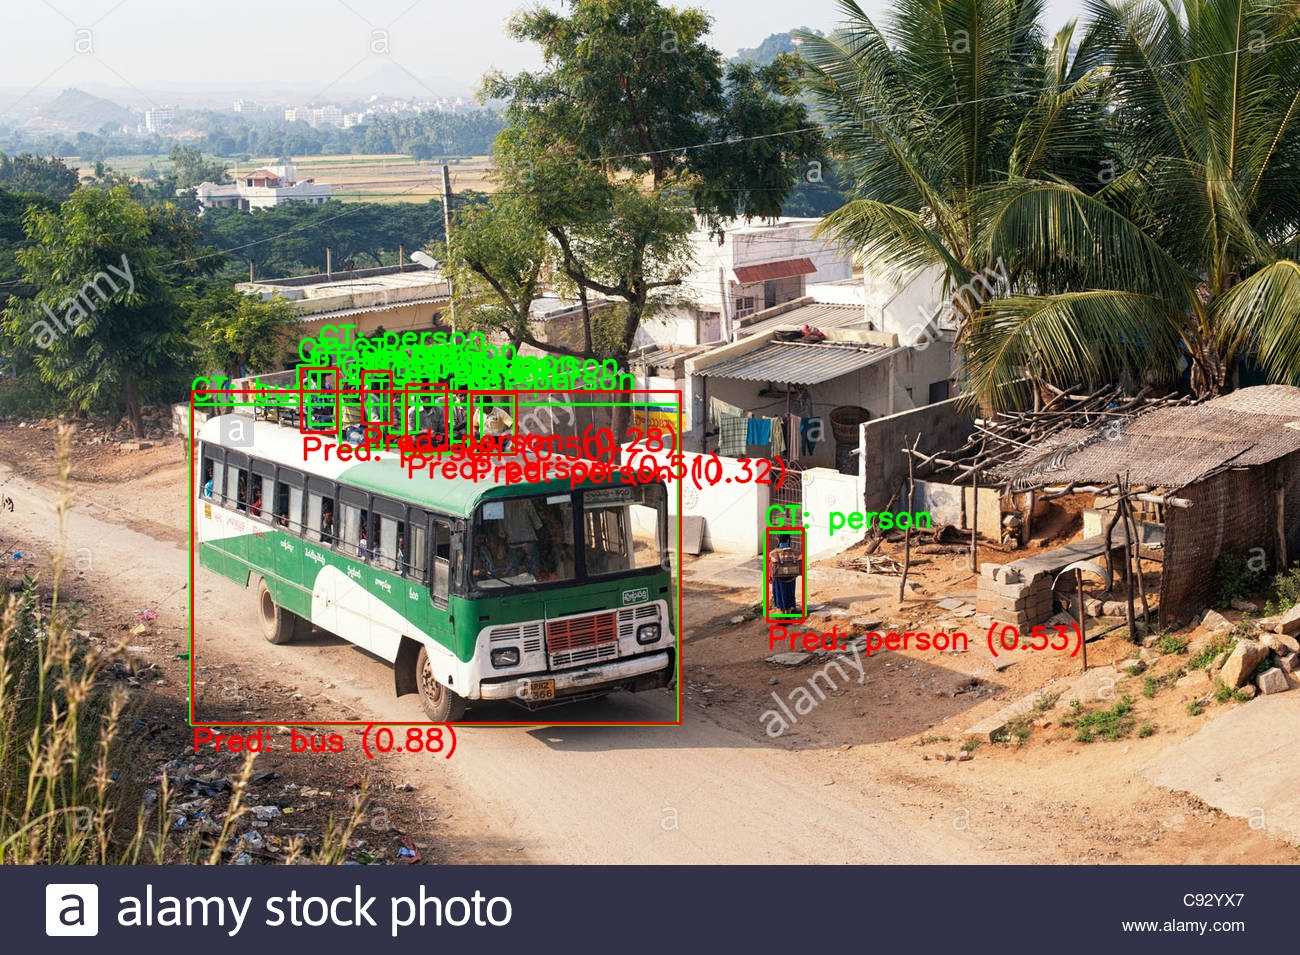


--- Comparison for 00 (49).jpg ---


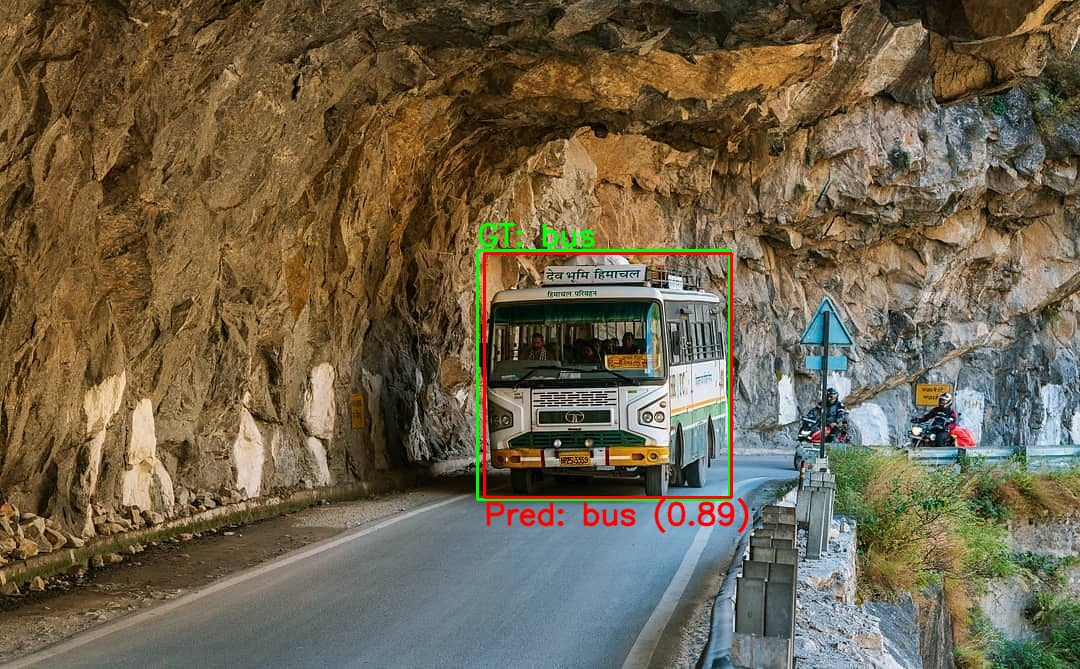


--- Comparison for 00 (189).jpg ---


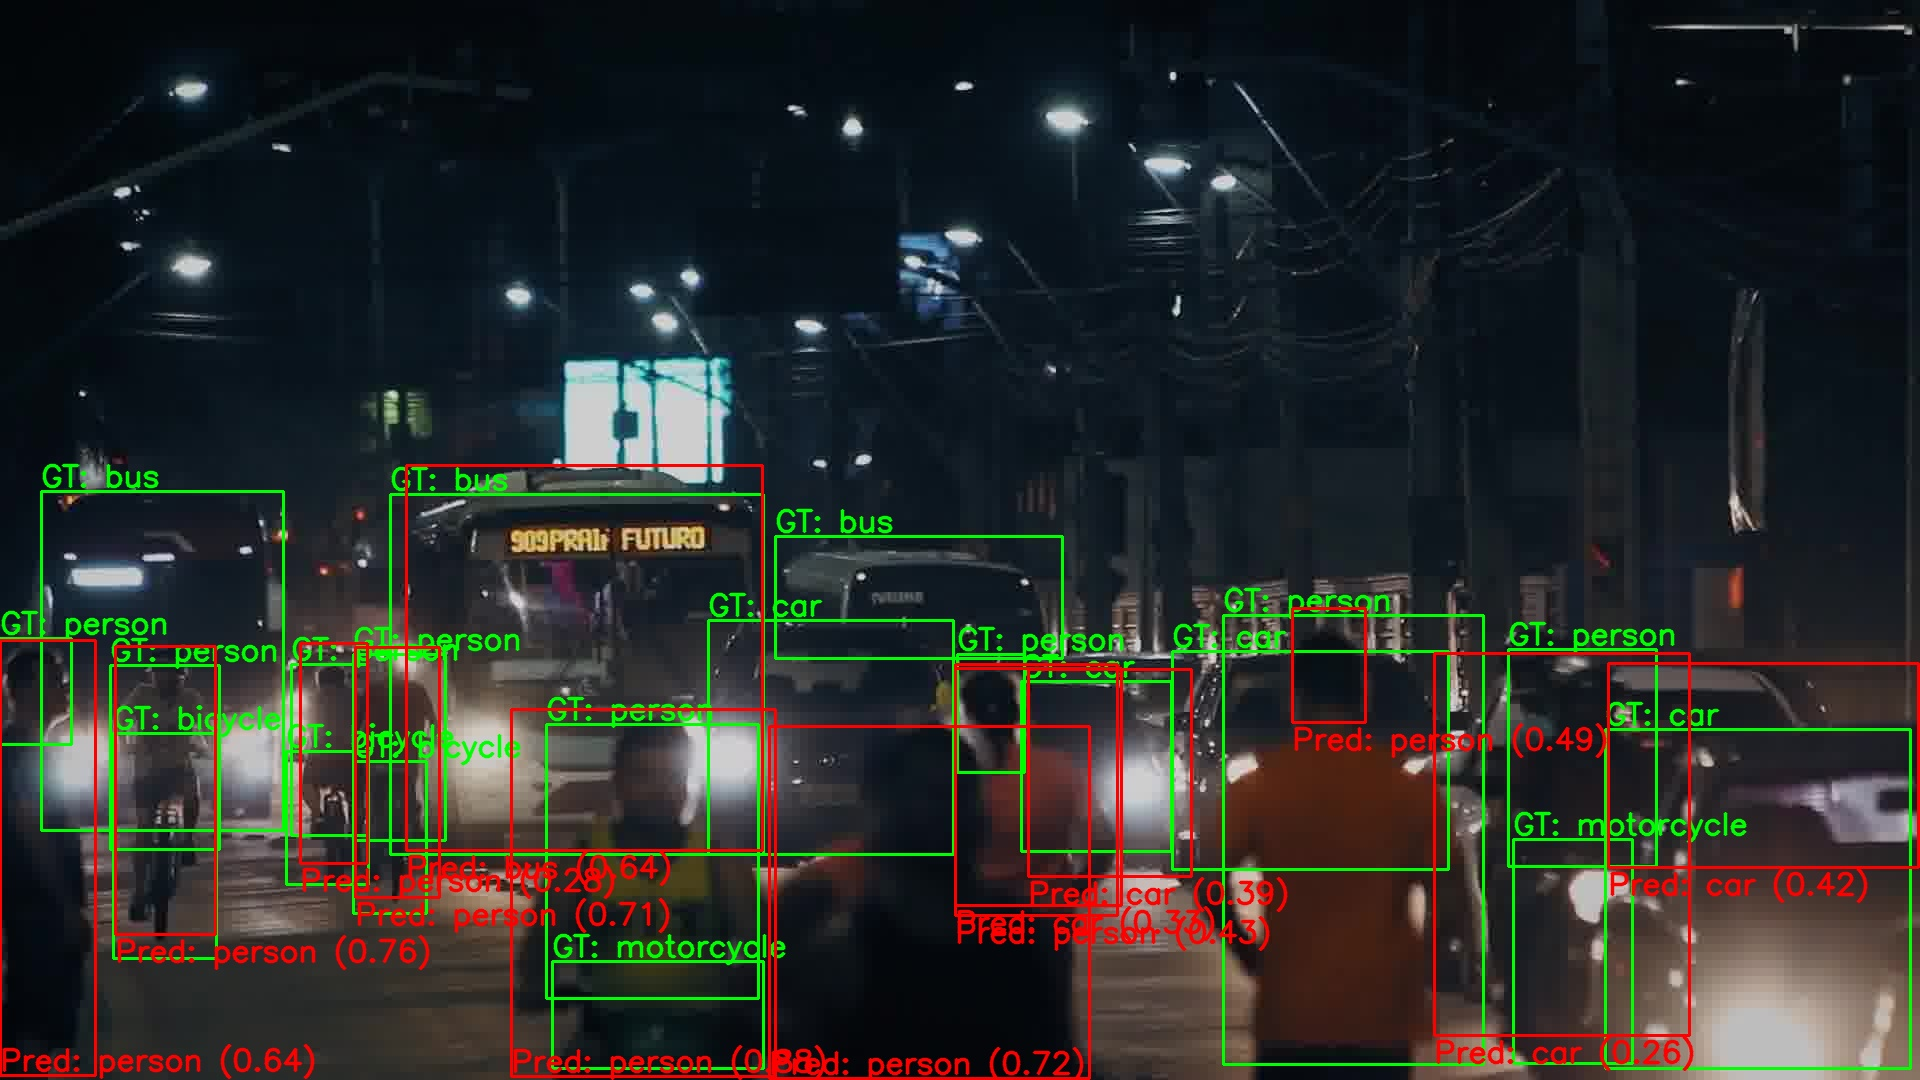


--- Comparison for 00 (293).jpg ---


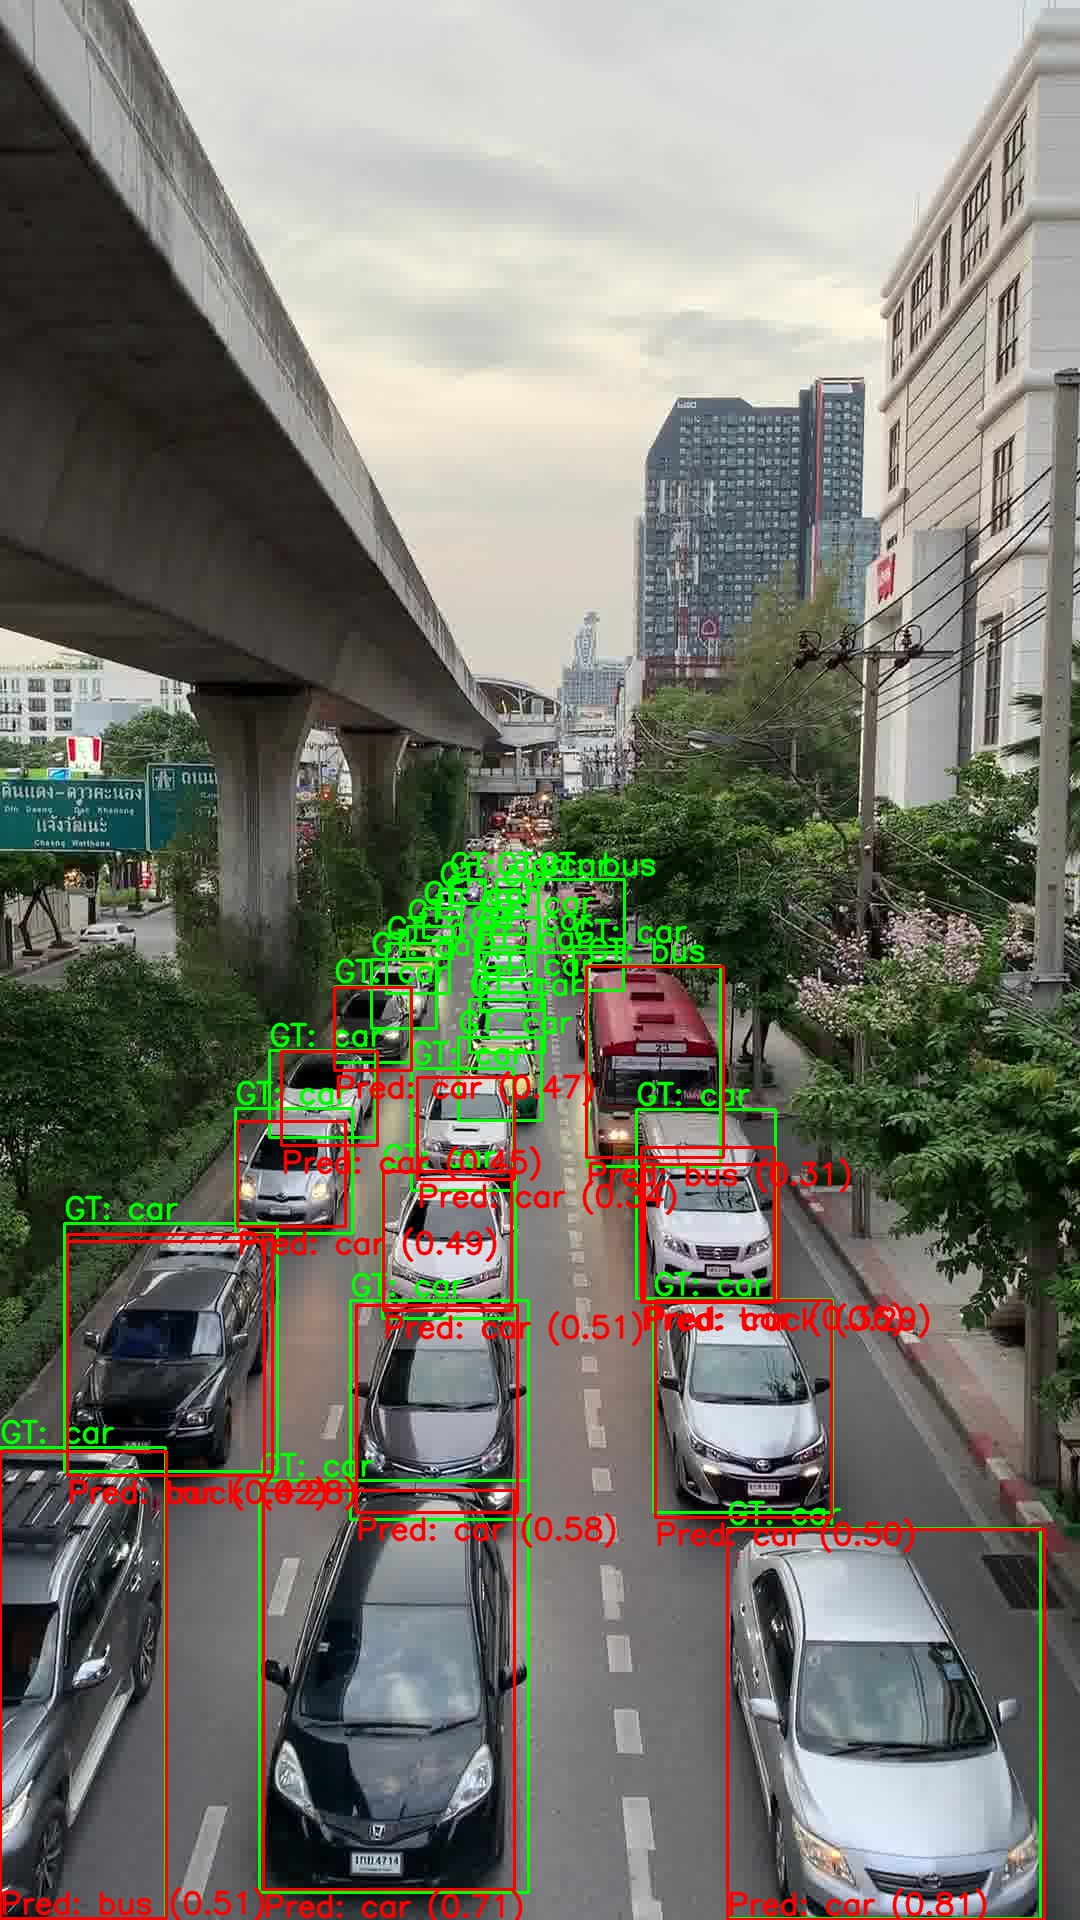


--- Comparison for 00 (210).jpg ---


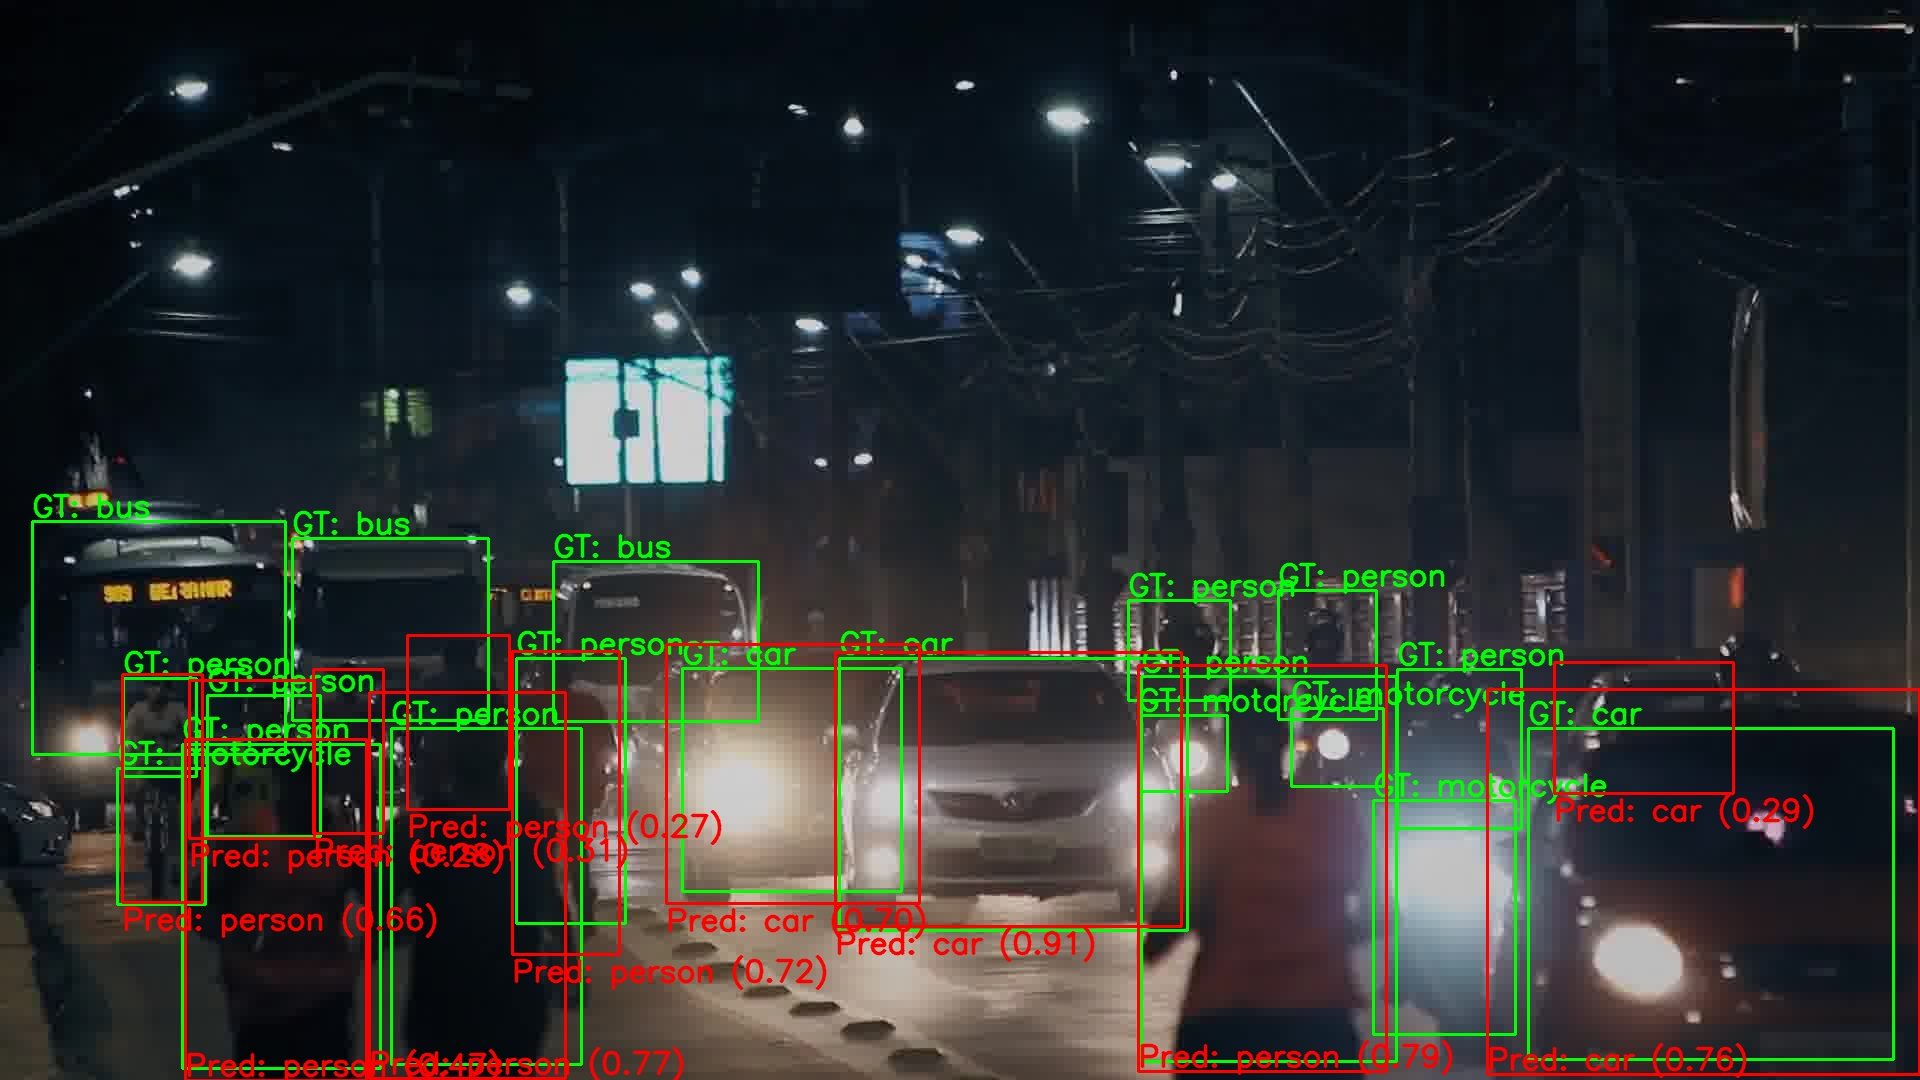


--- Comparison for 00 (110).jpg ---


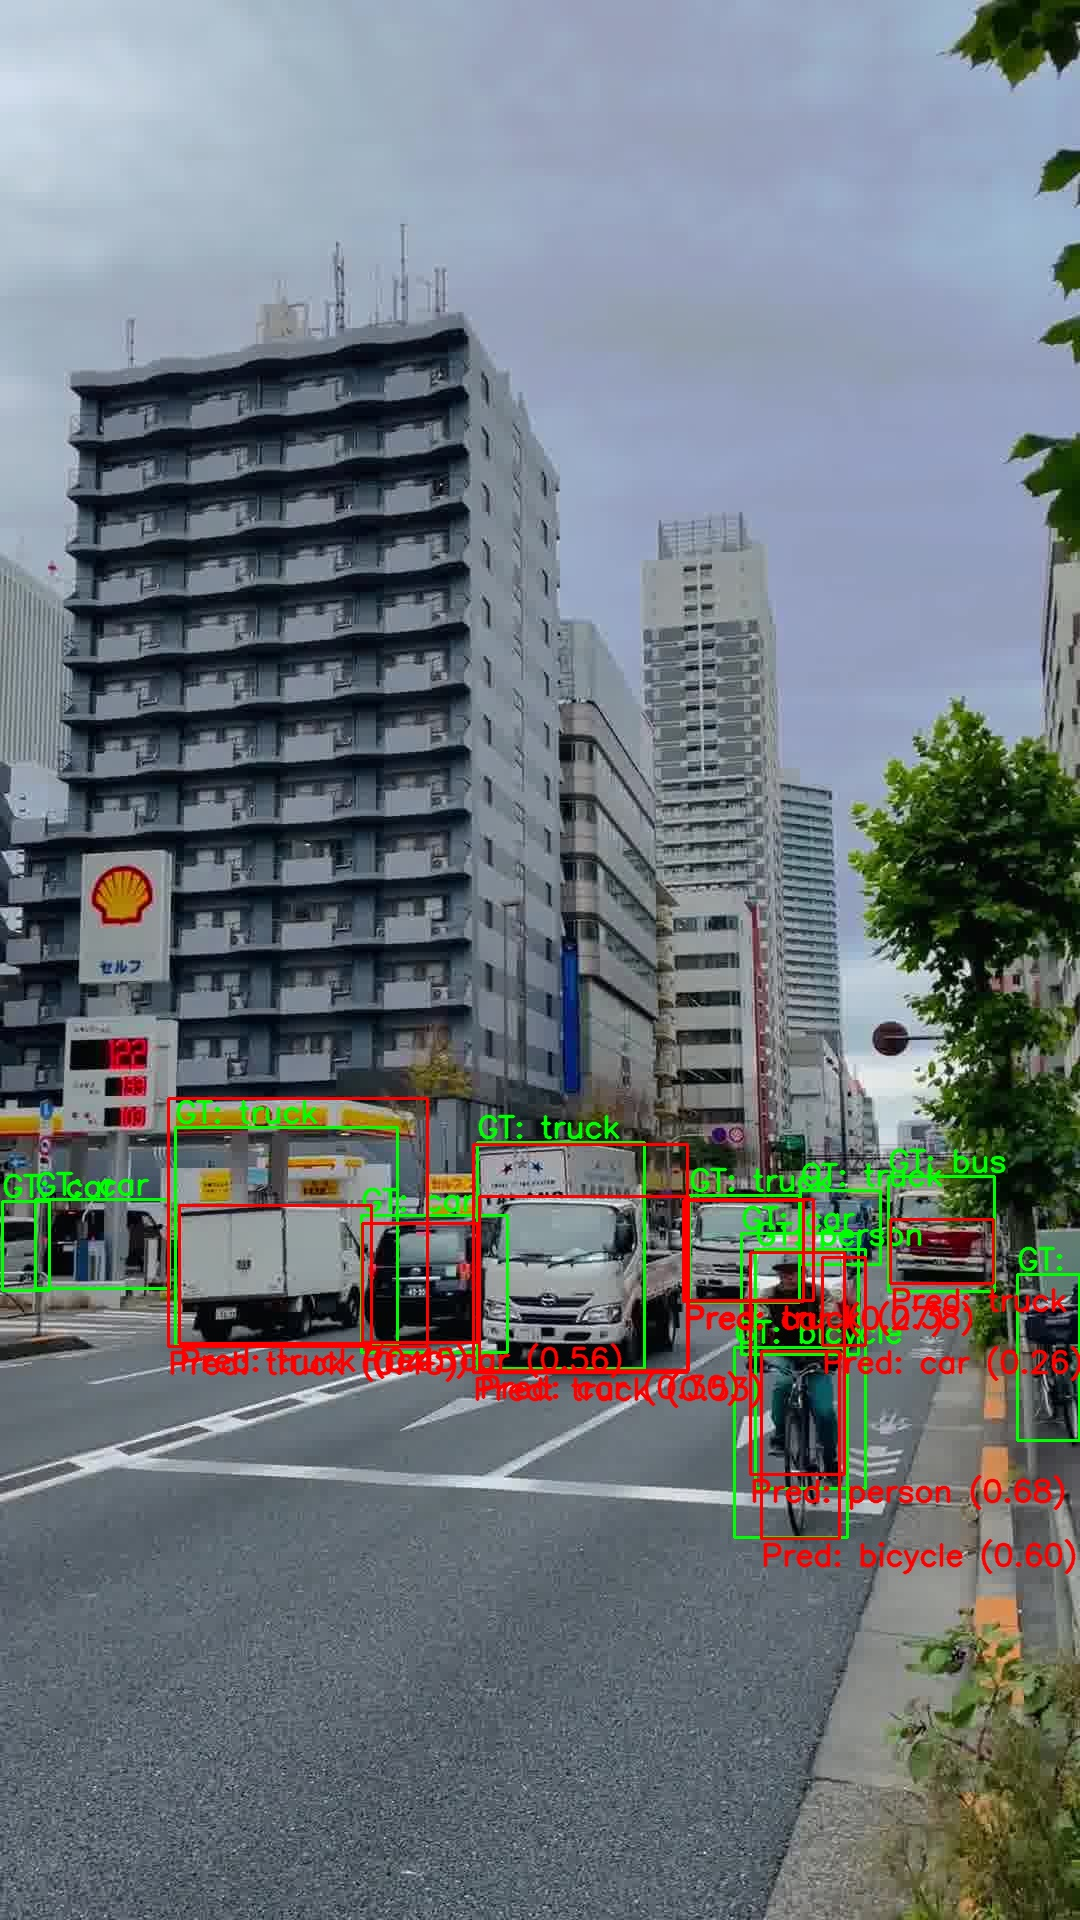


--- Comparison for 00 (54).jpg ---


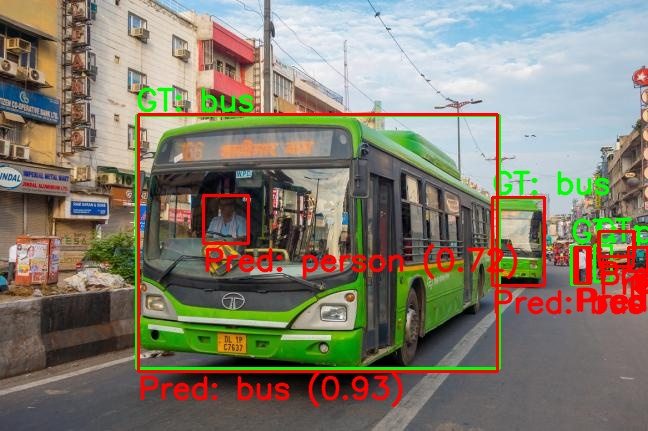


--- Comparison for 00 (106).jpg ---


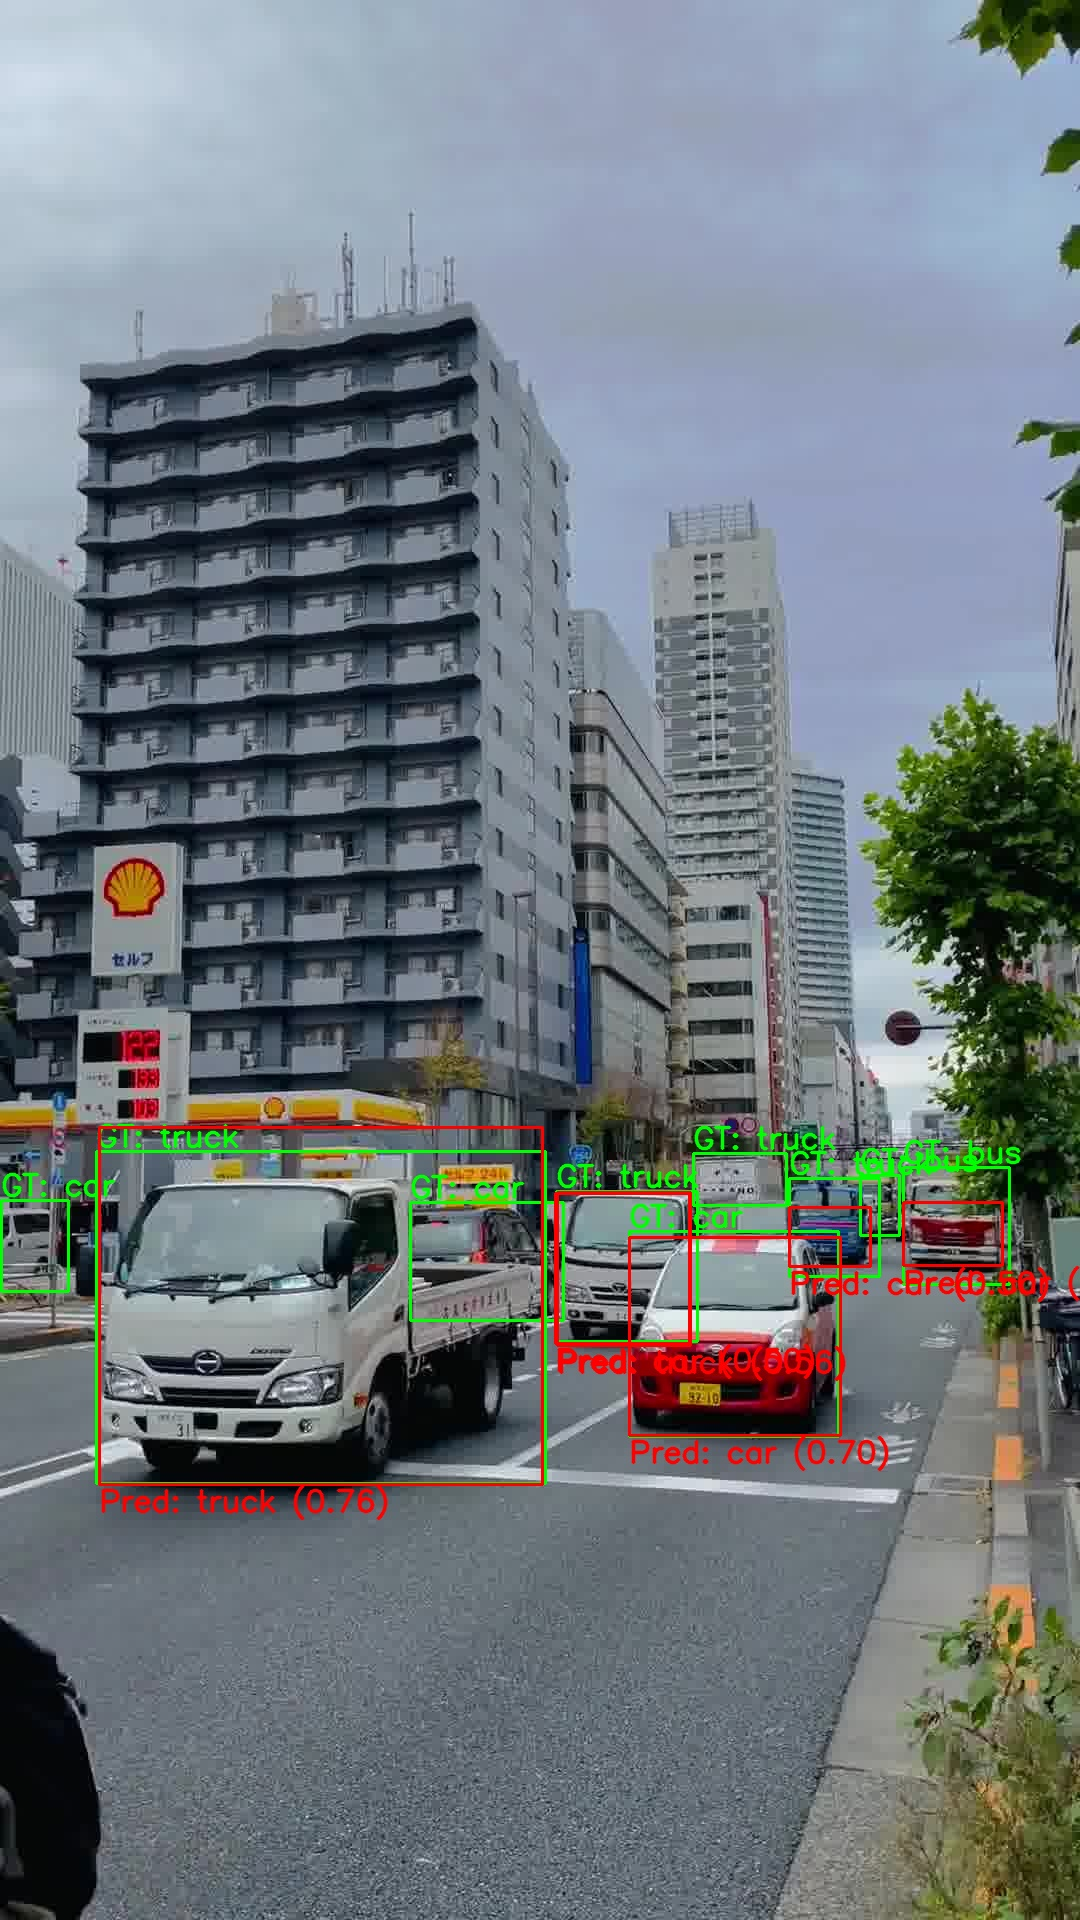


Comparison complete. Images saved to the 'yolo_comparison_results' folder.


In [29]:
import os
import random
import cv2
import numpy as np
from IPython.display import Image, display

# --- Đường dẫn tới thư mục ảnh và nhãn của bạn ---
# Đảm bảo rằng label_dir trỏ đến thư mục nhãn đã được cập nhật ID của bạn
# Ví dụ: nếu bạn đã đổi tên 'labels_no_auto_ids' thành 'labels', thì không cần sửa
# Nếu bạn vẫn giữ tên 'labels_no_auto_ids', thì cần sửa đường dẫn này:
# label_dir = os.path.join(YOLO_CUSTOM_DATASET_ROOT, 'labels_no_auto_ids')
image_dir = os.path.join(YOLO_CUSTOM_DATASET_ROOT, 'images')
label_dir = os.path.join(YOLO_CUSTOM_DATASET_ROOT, 'labels') # GIỮ NGUYÊN NẾU BẠN ĐÃ ĐỔI TÊN THƯ MỤC

# --- Lấy danh sách tất cả các file ảnh ---
# Đảm bảo YOLO_CUSTOM_DATASET_ROOT và custom_classes đã được định nghĩa ở các ô trước đó
# Ví dụ (nếu chưa định nghĩa):
# YOLO_CUSTOM_DATASET_ROOT = '/content/yolo_temp_extract/yolo_dataset'
# custom_classes = ['bicycle', 'bus', 'car', 'motorcycle', 'parking meter', 'person', 'traffic light', 'truck']
# yolov8_model = YOLO('yolov8n.pt') # Đảm bảo model đã được tải

if not os.path.exists(image_dir):
    print(f"Error: Image directory not found at {image_dir}. Please check your dataset extraction and paths.")
    # Bạn có thể muốn thoát hoặc bỏ qua phần này nếu thư mục không tồn tại
    # exit() # Uncomment this line if you want to stop execution immediately
else:
    image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    if not image_files:
        print(f"No image files found in {image_dir}. Please check the path and dataset content.")
    else:
        # --- Chọn ngẫu nhiên N ảnh để hiển thị ---
        num_images_to_show = 10 # Bạn có thể thay đổi số lượng ảnh muốn hiển thị
        selected_images = random.sample(image_files, min(num_images_to_show, len(image_files)))

        print(f"\n--- Comparing YOLOv8 predictions with Ground Truth for {len(selected_images)} sample images ---")

        # --- Thư mục để lưu ảnh so sánh ---
        comparison_results_dir = os.path.join(YOLO_CUSTOM_DATASET_ROOT, 'yolo_comparison_results')
        os.makedirs(comparison_results_dir, exist_ok=True)

        # --- Hàm để đọc nhãn YOLO và chuyển đổi sang pixel coordinates ---
        def read_yolo_labels(label_filepath, img_width, img_height):
            bboxes = []
            try:
                with open(label_filepath, 'r') as f:
                    for line in f:
                        parts = line.strip().split()
                        if len(parts) < 5:
                            print(f"Warning: Skipping malformed line in {label_filepath}: '{line.strip()}'")
                            continue
                        class_id = int(parts[0])
                        x_center, y_center, width, height = map(float, parts[1:])

                        if class_id >= 0 and class_id < len(custom_classes):
                            xmin = int((x_center - width / 2) * img_width)
                            ymin = int((y_center - height / 2) * img_height)
                            xmax = int((x_center + width / 2) * img_width)
                            ymax = int((y_center + height / 2) * img_height)
                            bboxes.append({'class_id': class_id, 'bbox': [xmin, ymin, xmax, ymax]})
                        else:
                            print(f"Warning: Ground Truth has invalid class_id {class_id} for custom_classes in {label_filepath}. Skipping bbox.")
            except FileNotFoundError:
                pass
            except ValueError as e:
                print(f"Error parsing line in {label_filepath}: {e}. Line: {line.strip()}")
            return bboxes

        for img_name in selected_images:
            img_path = os.path.join(image_dir, img_name)
            label_filepath = os.path.join(label_dir, os.path.splitext(img_name)[0] + '.txt')

            img = cv2.imread(img_path)
            if img is None:
                print(f"Warning: Could not read image {img_name}. Skipping.")
                continue
            img_height, img_width, _ = img.shape

            gt_bboxes = read_yolo_labels(label_filepath, img_width, img_height)

            results = yolov8_model(img_path, save=False, verbose=False)

            img_with_boxes = img.copy()

            # --- Cấu hình font và độ dày nét vẽ ---
            font_scale = 1 # Giảm kích thước font
            font_thickness = 2 # Giảm độ dày nét chữ
            box_thickness = 2 # Độ dày đường viền hộp

            # --- Vẽ Ground Truth Bounding Boxes (Màu xanh lá cây) ---
            for gt_obj in gt_bboxes:
                xmin, ymin, xmax, ymax = gt_obj['bbox']
                class_id = gt_obj['class_id']
                class_name = custom_classes[class_id] if class_id < len(custom_classes) else f"UNKNOWN GT Class {class_id}"
                color = (0, 255, 0) # Màu xanh lá cây

                # Vẽ hình chữ nhật
                cv2.rectangle(img_with_boxes, (xmin, ymin), (xmax, ymax), color, box_thickness)

                # Văn bản GT
                text = f"GT: {class_name}"
                (text_width, text_height), _ = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, font_scale, font_thickness)

                # Vị trí văn bản: Đặt ở trên hộp bounding box
                text_x = xmin
                text_y = ymin - 5 if ymin - 5 > text_height else ymin + text_height + 5 # Đảm bảo không bị ra ngoài ảnh hoặc che hộp

                cv2.putText(img_with_boxes, text, (text_x, text_y),
                            cv2.FONT_HERSHEY_SIMPLEX, font_scale, color, font_thickness, lineType=cv2.LINE_AA)

            # --- Vẽ Predicted Bounding Boxes (Màu đỏ) ---
            if isinstance(results, list):
                result = results[0]
            else:
                result = results

            if result.boxes is not None:
                yolo_model_class_names = yolov8_model.names

                for box in result.boxes:
                    xmin, ymin, xmax, ymax = map(int, box.xyxy[0])
                    conf = box.conf[0]
                    raw_class_id_from_model = int(box.cls[0])

                    predicted_class_name = yolo_model_class_names[raw_class_id_from_model] if raw_class_id_from_model < len(yolo_model_class_names) else f"Unknown COCO Class {raw_class_id_from_model}"

                    # Rút gọn nội dung hiển thị: chỉ tên lớp và độ tin cậy, BỎ PHẦN MATCH
                    display_name = f"Pred: {predicted_class_name} ({conf:.2f})"

                    color = (0, 0, 255) # Màu đỏ

                    # Vẽ hình chữ nhật
                    cv2.rectangle(img_with_boxes, (xmin, ymin), (xmax, ymax), color, box_thickness)

                    # Văn bản Pred
                    (text_width, text_height), _ = cv2.getTextSize(display_name, cv2.FONT_HERSHEY_SIMPLEX, font_scale, font_thickness)

                    # Vị trí văn bản: Đặt ở dưới hộp bounding box
                    text_x = xmin
                    text_y = ymax + text_height + 5 if ymax + text_height + 5 < img_height else ymax - 5 # Đảm bảo không bị ra ngoài ảnh hoặc che hộp

                    cv2.putText(img_with_boxes, display_name, (text_x, text_y),
                                cv2.FONT_HERSHEY_SIMPLEX, font_scale, color, font_thickness, lineType=cv2.LINE_AA)

            # Lưu ảnh kết quả
            comparison_img_path = os.path.join(comparison_results_dir, f"compare_{img_name}")
            cv2.imwrite(comparison_img_path, img_with_boxes)

            # Hiển thị ảnh
            print(f"\n--- Comparison for {img_name} ---")
            display(Image(filename=comparison_img_path, width=800))

        print("\nComparison complete. Images saved to the 'yolo_comparison_results' folder.")

In [66]:
import os
import torch
import torchvision
from torchvision.models.detection import fasterrcnn_resnet50_fpn_v2, FasterRCNN_ResNet50_FPN_V2_Weights
from torchvision.transforms import functional as F
from PIL import Image as PILImage
import json
import numpy as np
from tqdm.notebook import tqdm

In [65]:
# Cài đặt torchmetrics nếu chưa có
!pip install torchmetrics

In [67]:
from torchmetrics.detection.mean_ap import MeanAveragePrecision
# Để hiển thị ảnh
from IPython.display import Image, display
import cv2
import random

In [68]:
# --- BƯỚC 1: Chuẩn bị môi trường và tải mô hình Faster R-CNN ---
print("--- Chuẩn bị môi trường và tải mô hình Faster R-CNN ---")

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

weights = FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT
faster_rcnn_model = fasterrcnn_resnet50_fpn_v2(weights=weights)
faster_rcnn_model.eval() # Chắc chắn ở chế độ đánh giá
faster_rcnn_model.to(device)

print("Faster R-CNN model loaded successfully.")

# Sửa đổi tại đây: Truy cập tên lớp qua weights.meta["categories"]
coco_original_class_names = weights.meta["categories"]
print(f"Original COCO classes for Faster R-CNN: {coco_original_class_names[:5]}... (total {len(coco_original_class_names)} classes)")


--- Chuẩn bị môi trường và tải mô hình Faster R-CNN ---
Using device: cpu
Faster R-CNN model loaded successfully.
Original COCO classes for Faster R-CNN: ['__background__', 'person', 'bicycle', 'car', 'motorcycle']... (total 91 classes)


In [69]:
# --- BƯỚC 2: Chuẩn bị Dataset cho Faster R-CNN (định dạng COCO) ---
# Faster R-CNN yêu cầu dữ liệu ở định dạng COCO, và bạn đã có annotations.json
print("\n--- Chuẩn bị Dataset cho Faster R-CNN (định dạng COCO) ---")

coco_annotation_file = os.path.join(RCNN_CUSTOM_DATASET_ROOT, 'annotations.json')
coco_image_dir = RCNN_CUSTOM_DATASET_ROOT

# Để đọc annotations.json một cách đơn giản hơn
class COCODatasetSimple(torch.utils.data.Dataset): # Kế thừa từ Dataset để DataLoader có thể dùng
    def __init__(self, annotation_file, image_dir, transform=None):
        if not os.path.exists(annotation_file):
            raise FileNotFoundError(f"Annotation file not found: {annotation_file}")

        with open(annotation_file, 'r', encoding='utf-8') as f:
            self.coco = json.load(f)
        self.image_dir = image_dir
        self.transform = transform
        self.image_ids = [img['id'] for img in self.coco['images']]

        self.img_id_to_info = {img['id']: img for img in self.coco['images']}
        self.cat_id_to_name = {cat['id']: cat['name'] for cat in self.coco['categories']}
        self.name_to_cat_id = {cat['name']: cat['id'] for cat in self.coco['categories']}

        self.img_to_anns = {}
        for ann in self.coco['annotations']:
            if ann['image_id'] not in self.img_to_anns:
                self.img_to_anns[ann['image_id']] = []
            self.img_to_anns[ann['image_id']].append(ann)

    def __len__(self):
        return len(self.image_ids)

    def __getitem__(self, idx):
        img_id = self.image_ids[idx]
        img_info = self.img_id_to_info[img_id]
        img_path = os.path.join(self.image_dir, img_info['file_name'])

        image = PILImage.open(img_path).convert("RGB")
        # w, h = image.size # Không cần thiết ở đây

        boxes = []
        labels = []
        area = []
        iscrowd = []

        annotations = self.img_to_anns.get(img_id, [])

        for ann in annotations:
            # bbox: [x_min, y_min, width, height]
            x_min, y_min, box_w, box_h = ann['bbox']
            x_max = x_min + box_w
            y_max = y_min + box_h

            boxes.append([x_min, y_min, x_max, y_max])
            labels.append(ann['category_id']) # Sử dụng category_id từ annotations.json (đã là 0-7)
            # Đảm bảo box có kích thước hợp lệ
            if box_w > 0 and box_h > 0:
                area.append(ann['area'])
            else:
                area.append(0.0) # Gán diện tích 0 nếu box không hợp lệ
            iscrowd.append(ann['iscrowd'])

        # Xử lý trường hợp không có bounding box nào
        if not boxes: # nếu danh sách boxes rỗng
            boxes = torch.zeros((0, 4), dtype=torch.float32)
            labels = torch.zeros((0,), dtype=torch.int64)
            area = torch.zeros((0,), dtype=torch.float32)
            iscrowd = torch.zeros((0,), dtype=torch.uint8)
        else:
            boxes = torch.as_tensor(boxes, dtype=torch.float32)
            labels = torch.as_tensor(labels, dtype=torch.int64)
            area = torch.as_tensor(area, dtype=torch.float32)
            iscrowd = torch.as_tensor(iscrowd, dtype=torch.uint8)


        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        target["image_id"] = torch.tensor([img_id])
        target["area"] = area
        target["iscrowd"] = iscrowd

        if self.transform:
            image = self.transform(image)

        return image, target, img_path, img_info['file_name']

if not os.path.exists(coco_annotation_file):
    print(f"Error: annotations.json not found at {coco_annotation_file}")
    print("Please ensure your R-CNN dataset zip contained 'annotations.json' directly inside.")
    raise FileNotFoundError(f"annotations.json not found at {coco_annotation_file}. Please check the path.")
else:
    dataset = COCODatasetSimple(coco_annotation_file, coco_image_dir, transform=F.to_tensor)
    image_ids = dataset.image_ids
    print(f"Loaded {len(image_ids)} images for Faster R-CNN evaluation.")



--- Chuẩn bị Dataset cho Faster R-CNN (định dạng COCO) ---
Loaded 92 images for Faster R-CNN evaluation.


In [70]:

    # --- BƯỚC 3: Chạy Inference và thu thập kết quả ---
    print("\n--- Chạy Inference và thu thập kết quả Faster R-CNN ---")

    # Sửa đổi tại đây: Bỏ num_classes khỏi hàm khởi tạo (torchmetrics tự xử lý số lớp từ labels)
    metric = MeanAveragePrecision(box_format="xyxy", class_metrics=True, iou_type="bbox")
    metric.to(device)

    preds = []
    targets = []

    print("Collecting predictions and ground truths...")
    for i in tqdm(range(len(dataset)), desc="Processing images"):
        image_tensor, target, img_path, img_file_name = dataset[i]

        # Ground Truth (GT): labels đã là ID 0-7 từ annotations.json
        # Không cần ánh xạ lại target labels, vì chúng đã đúng rồi
        if target['labels'].numel() > 0:
            targets.append({
                "boxes": target['boxes'].to(device),
                "labels": target['labels'].to(device) # Labels đã đúng 0-7
            })
        else:
            # Thêm targets rỗng nếu không có GT để tránh lỗi trong torchmetrics
            targets.append({
                "boxes": torch.empty((0, 4)).to(device),
                "labels": torch.empty((0), dtype=torch.int64).to(device)
            })

        with torch.no_grad():
            prediction = faster_rcnn_model([image_tensor.to(device)])[0]

        pred_boxes = []
        pred_labels_mapped = [] # Labels sau khi ánh xạ về 0-7
        pred_scores = []

        for j in range(len(prediction['boxes'])):
            pred_box = prediction['boxes'][j]
            pred_label_original_coco_id = prediction['labels'][j].item() # Đây là ID COCO gốc của dự đoán
            pred_score = prediction['scores'][j]

            # Ánh xạ ID dự đoán từ COCO gốc sang ID 0-7 của bạn
            if pred_label_original_coco_id in coco_original_id_to_custom_metric_idx and pred_score >= 0.05:
                mapped_label = coco_original_id_to_custom_metric_idx[pred_label_original_coco_id]
                pred_boxes.append(pred_box)
                pred_labels_mapped.append(mapped_label)
                pred_scores.append(pred_score)

        if len(pred_boxes) > 0:
            preds.append({
                "boxes": torch.stack(pred_boxes).to(device),
                "scores": torch.stack(pred_scores).to(device),
                "labels": torch.tensor(pred_labels_mapped, dtype=torch.int64).to(device)
            })
        else:
            # Thêm preds rỗng nếu không có dự đoán hợp lệ để tránh lỗi trong torchmetrics
            preds.append({
                "boxes": torch.empty((0, 4)).to(device),
                "scores": torch.empty((0)).to(device),
                "labels": torch.empty((0), dtype=torch.int64).to(device)
            })

    metric.update(preds, targets)


--- Chạy Inference và thu thập kết quả Faster R-CNN ---


Processing images:   0%|          | 0/92 [00:00<?, ?it/s]

In [71]:
# --- BƯỚC 4: Tính toán mAP, Precision, Recall bằng torchmetrics ---
try:
    results = metric.compute()

    print("\n--- Faster R-CNN Evaluation Results ---")
    print(f"mAP@0.5 (Pascal VOC): {results.get('map_50', torch.tensor(0.0)).item():.4f}")
    print(f"mAP@0.5:0.95 (COCO): {results.get('map', torch.tensor(0.0)).item():.4f}")
    print(f"Average Recall (AR) with max 100 detections: {results.get('mar_100', torch.tensor(0.0)).item():.4f}")

except Exception as e:
    print(f"Error calculating metrics: {e}")
    print("This might happen if there are no ground truth objects or no predictions matching your filtered classes.")


--- Faster R-CNN Evaluation Results ---
mAP@0.5 (Pascal VOC): 0.4967
mAP@0.5:0.95 (COCO): 0.2872
Average Recall (AR) with max 100 detections: 0.4595



--- Hiển thị kết quả trực quan của Faster R-CNN ---

--- Comparison for 11 (25).png ---


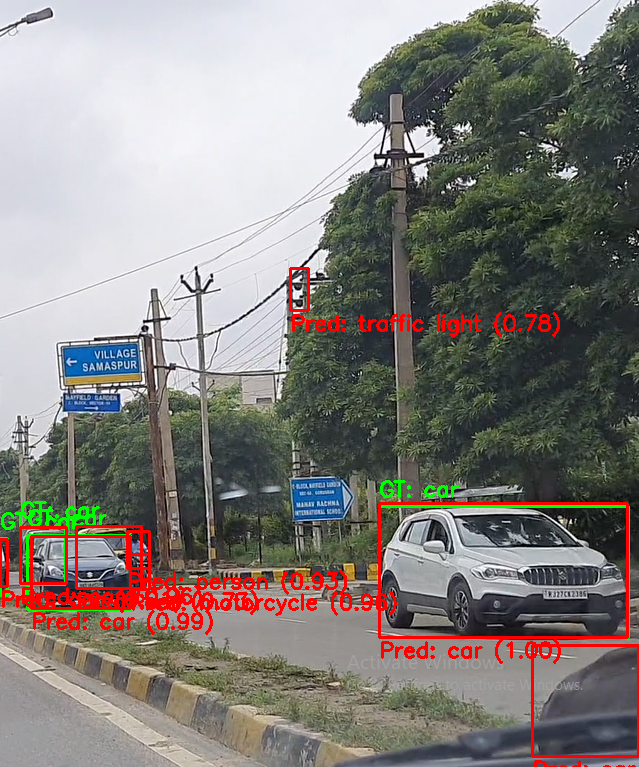


--- Comparison for 00 (211).jpg ---


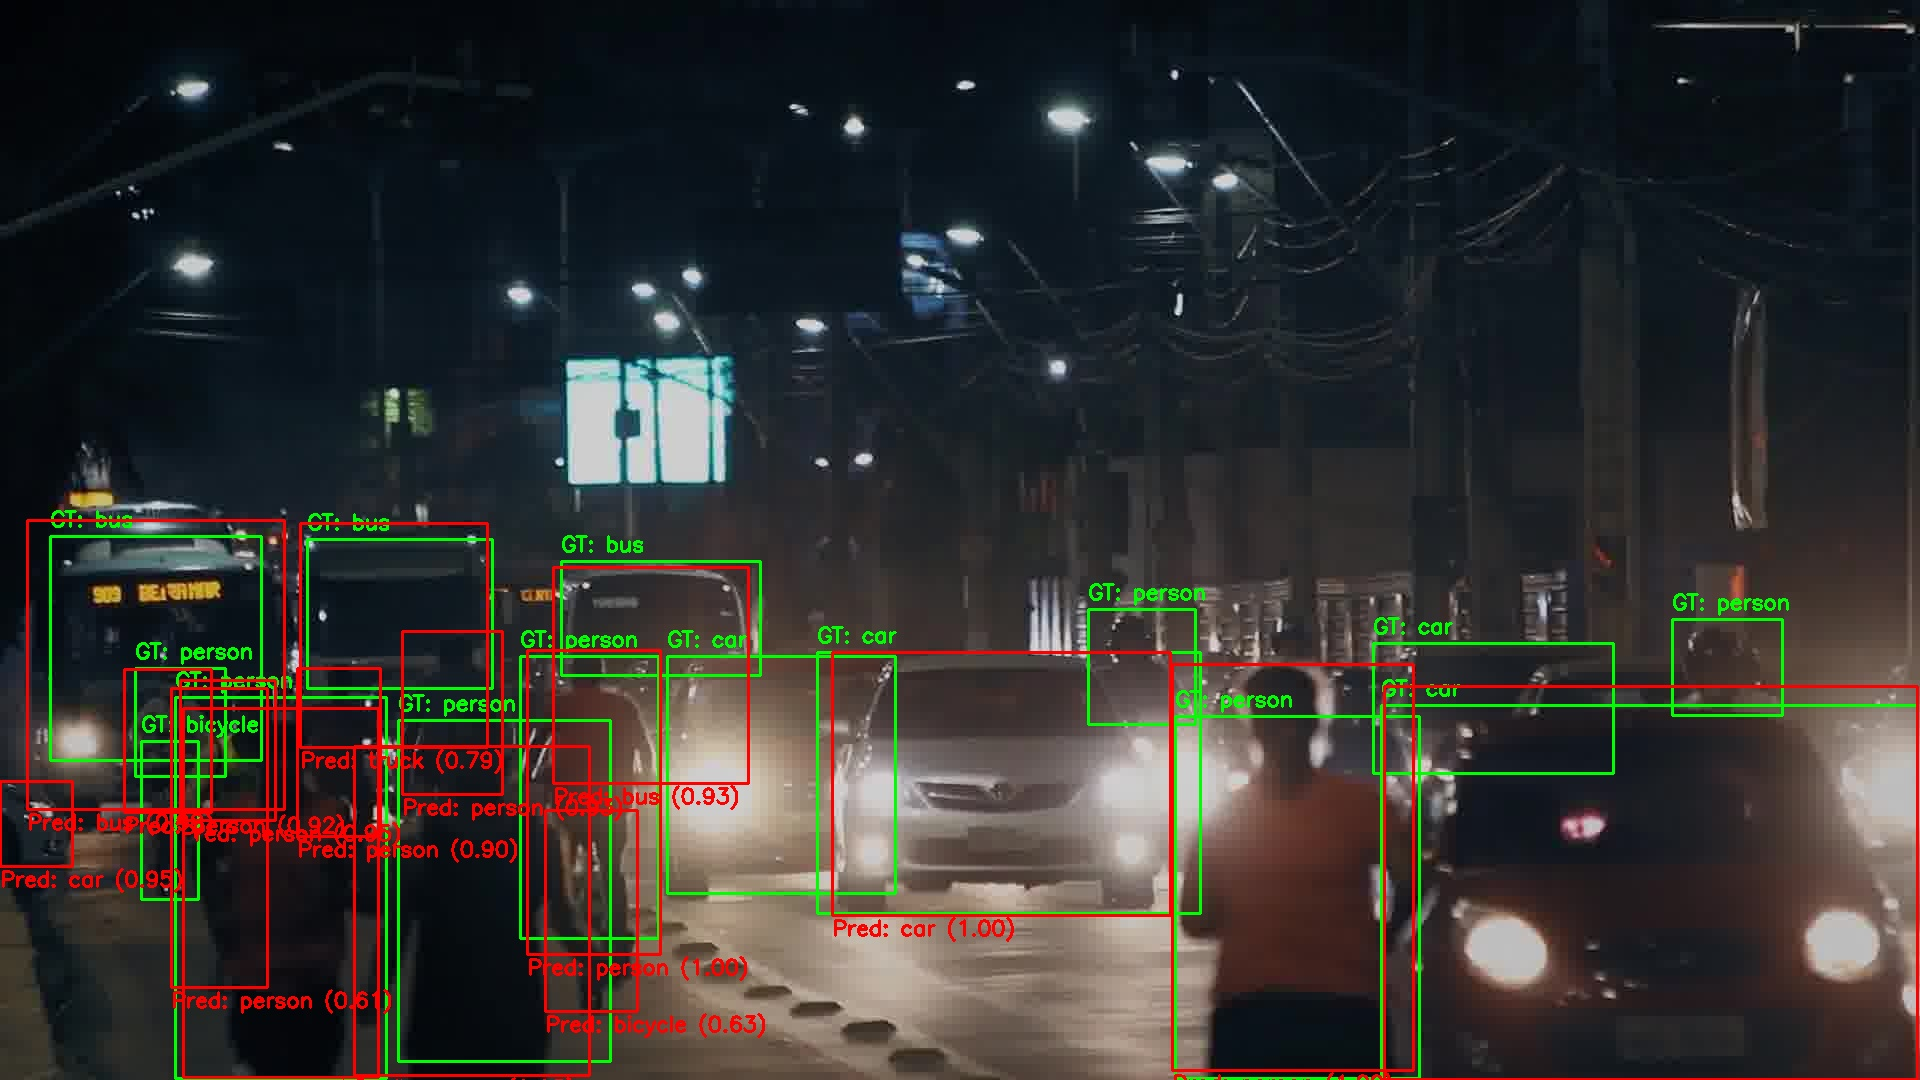


--- Comparison for 11 (4).png ---


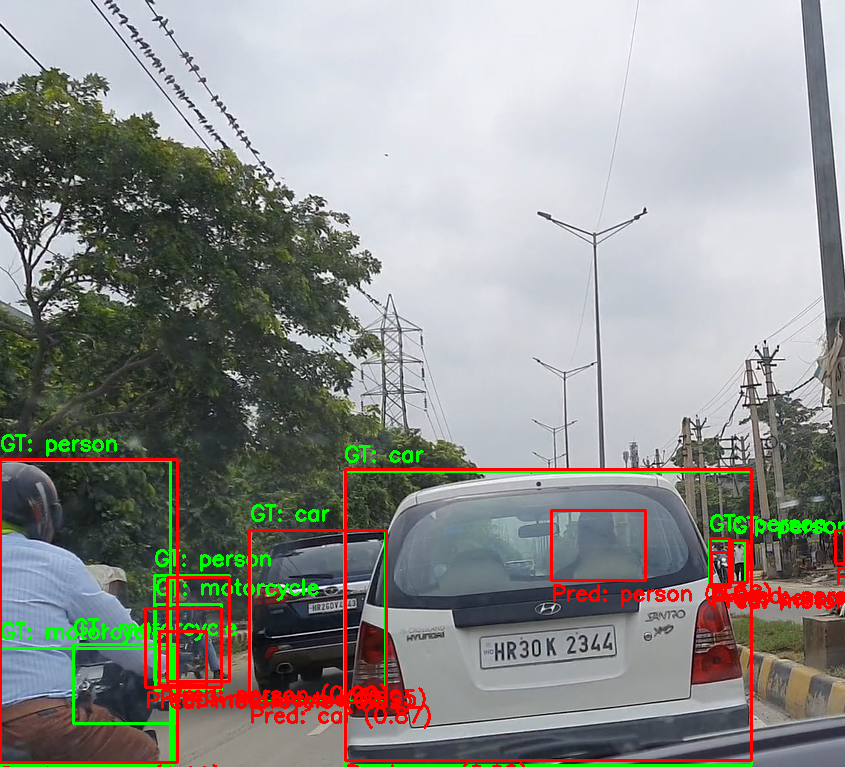


--- Comparison for 00 (162).jpg ---


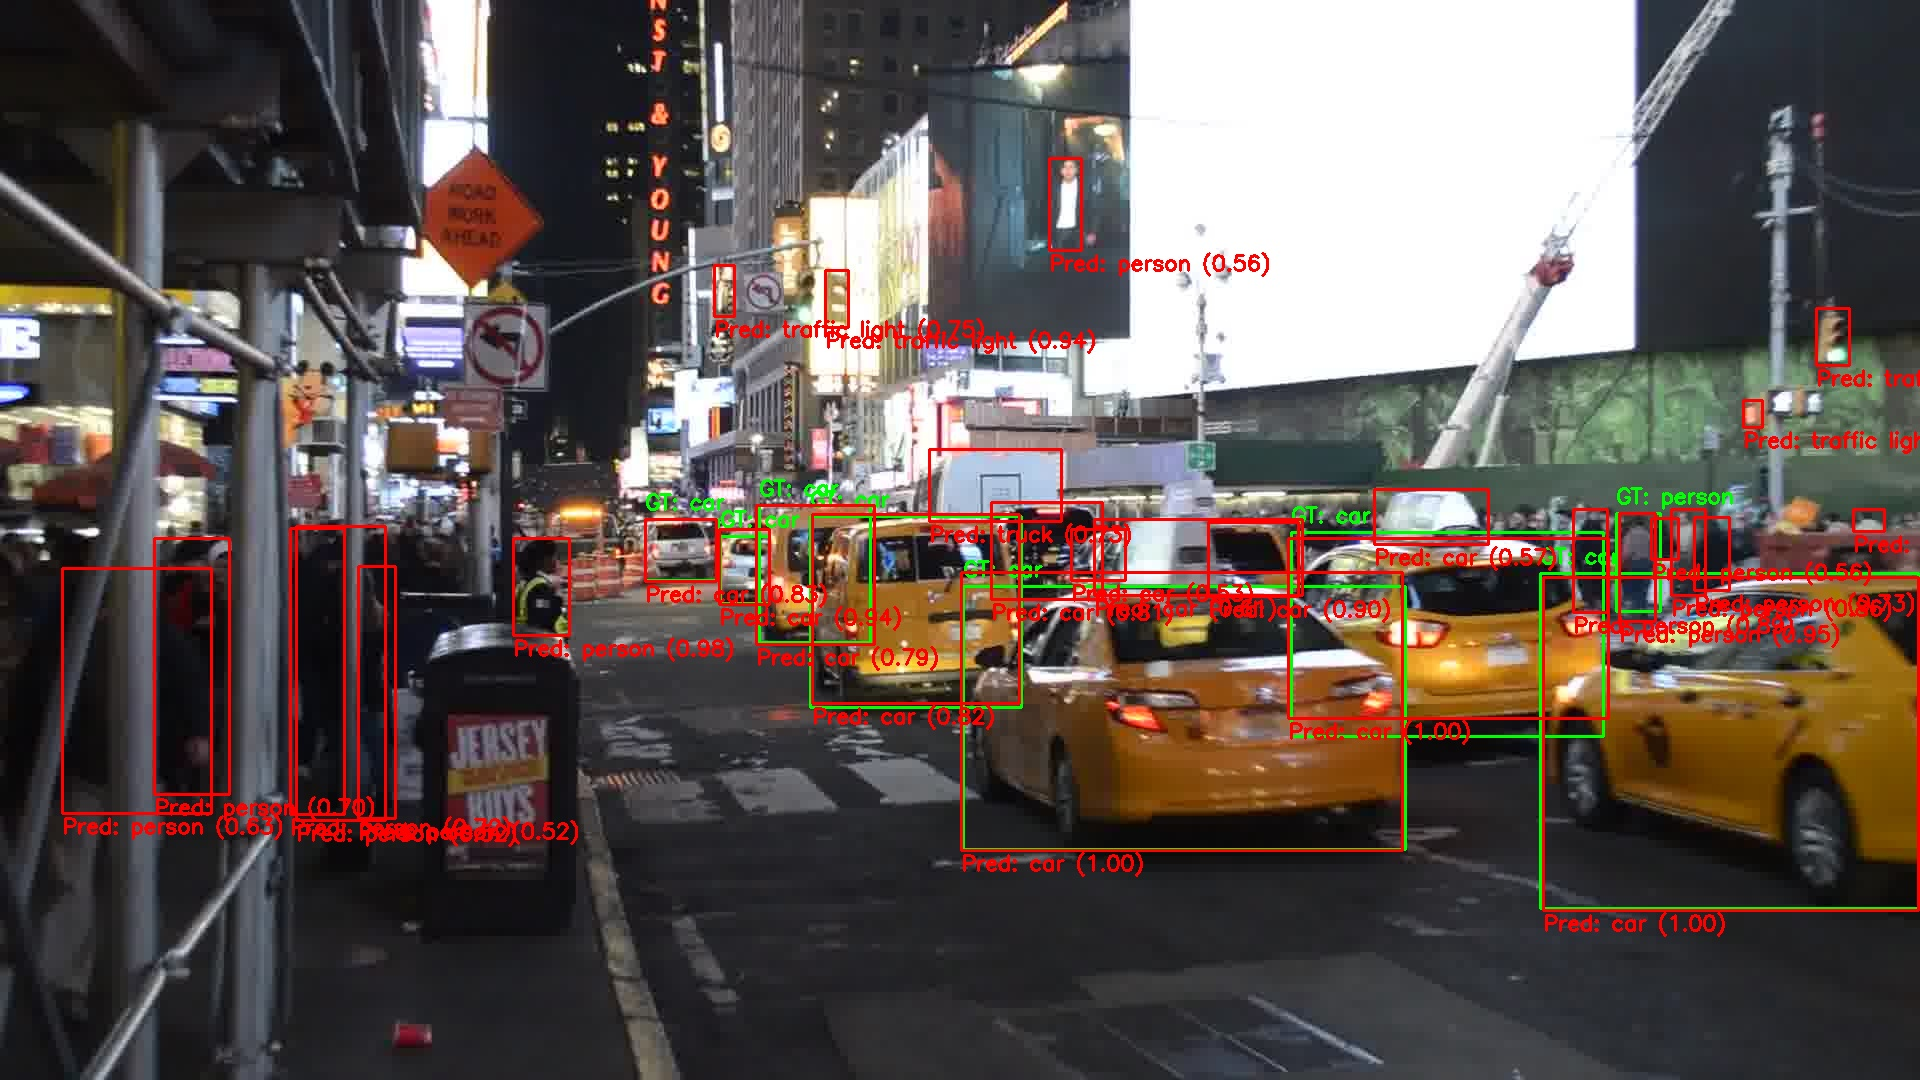


--- Comparison for 00 (160).jpg ---


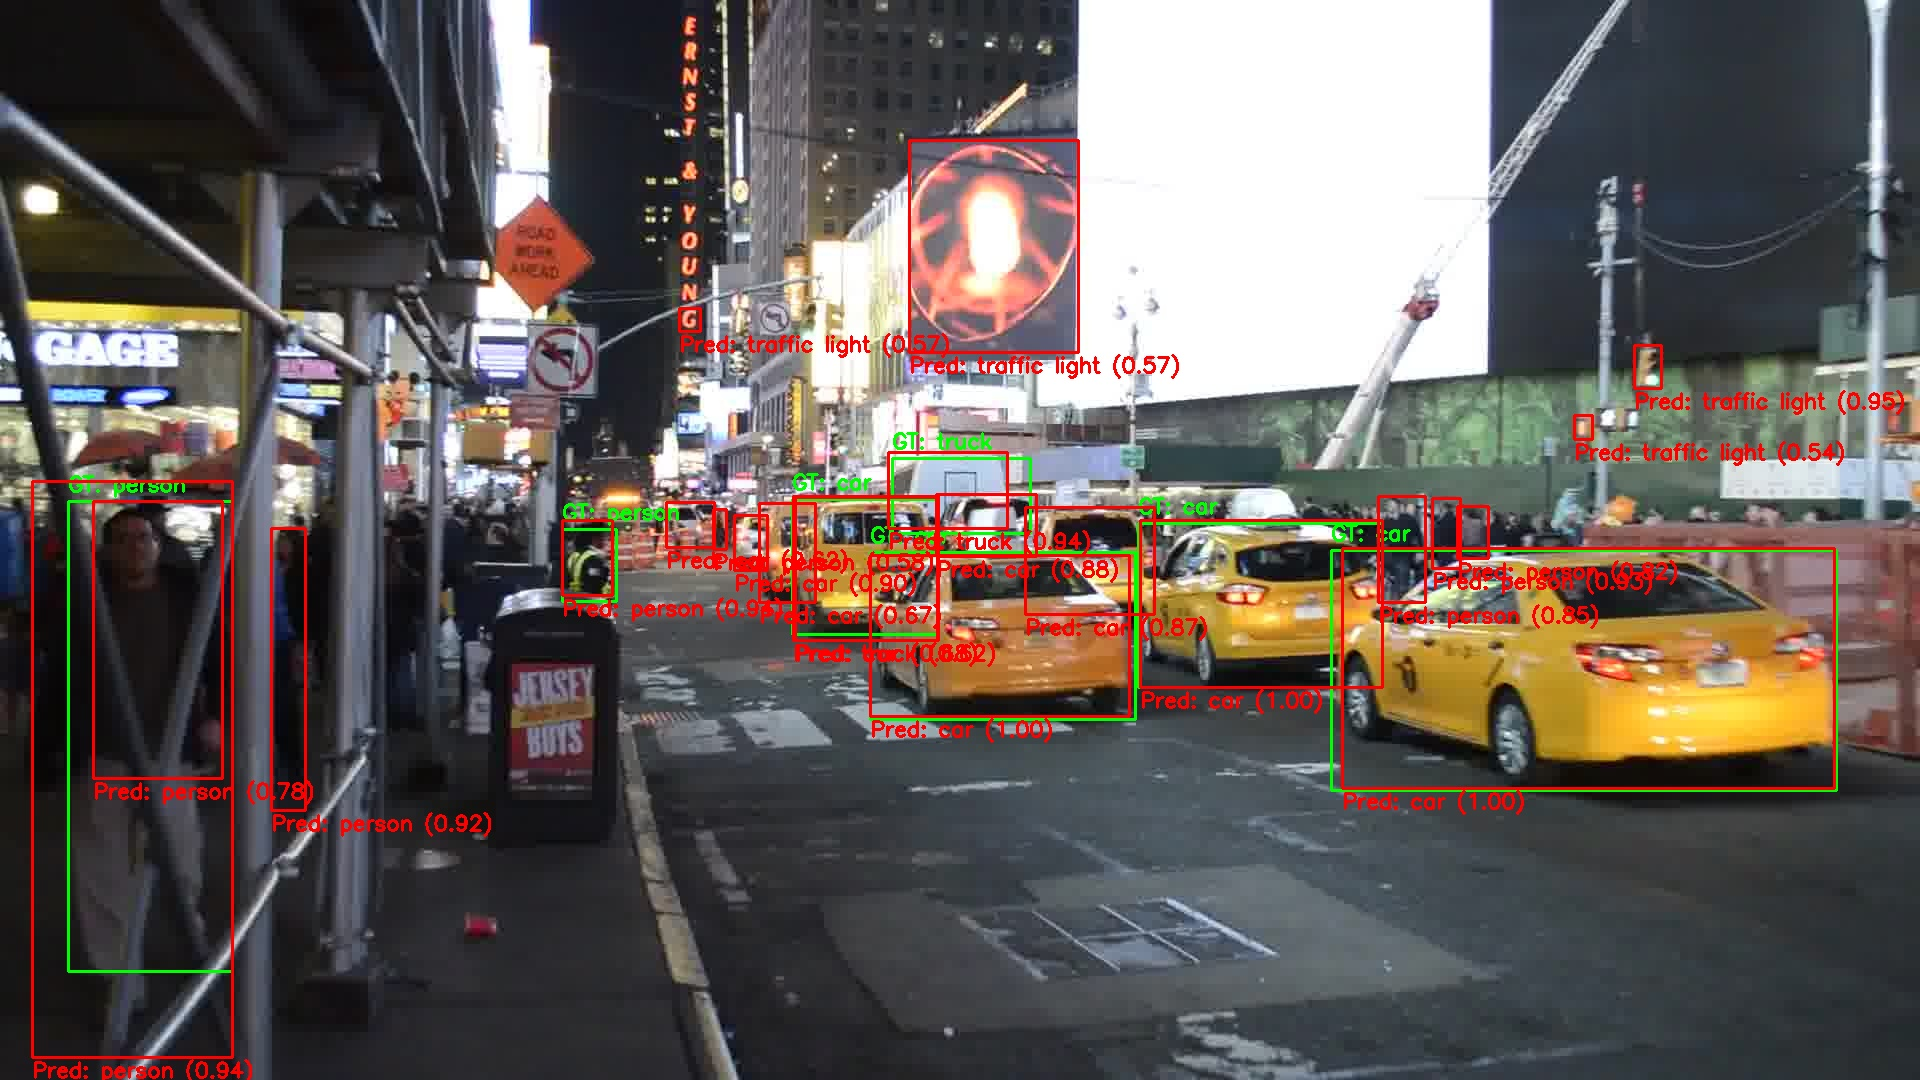


Faster R-CNN comparison with torchmetrics complete. Images saved to 'rcnn_comparison_results_torchmetrics' folder.


In [73]:

    print("\n--- Hiển thị kết quả trực quan của Faster R-CNN ---")

    num_images_to_show_vis = 5
    selected_image_indices = random.sample(range(len(dataset)), min(num_images_to_show_vis, len(dataset)))

    comparison_rcnn_results_dir = os.path.join(RCNN_CUSTOM_DATASET_ROOT, 'rcnn_comparison_results_torchmetrics')
    os.makedirs(comparison_rcnn_results_dir, exist_ok=True)

    for idx in selected_image_indices:
        image_tensor, target, img_path, img_file_name = dataset[idx]

        img = cv2.imread(img_path)
        if img is None:
            print(f"Warning: Could not read image {img_file_name}. Skipping visualization.")
            continue

        img_with_boxes = img.copy()

        # --- Vẽ Ground Truth Bounding Boxes (Màu xanh lá cây) ---
        for i in range(len(target['boxes'])):
            bbox = target['boxes'][i].cpu().numpy()
            xmin, ymin, xmax, ymax = map(int, bbox)

            class_id_custom = target['labels'][i].item() # Đây là ID 0-7 của bạn
            class_name = dataset.cat_id_to_name[class_id_custom] # Sử dụng ánh xạ của dataset

            color = (0, 255, 0)
            thickness = 2
            cv2.rectangle(img_with_boxes, (xmin, ymin), (xmax, ymax), color, thickness)
            cv2.putText(img_with_boxes, f"GT: {class_name}", (xmin, ymin - 10),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, thickness)

        with torch.no_grad():
            raw_prediction = faster_rcnn_model([image_tensor.to(device)])[0]

        # --- Vẽ Predicted Bounding Boxes (Màu đỏ) ---
        for j in range(len(raw_prediction['boxes'])):
            pred_box = raw_prediction['boxes'][j].cpu().numpy()
            pred_label_original_coco_id = raw_prediction['labels'][j].item() # ID COCO gốc từ mô hình
            pred_score = raw_prediction['scores'][j].item()

            if pred_score > 0.5: # Ngưỡng tự tin để hiển thị
                # Ánh xạ pred_label_original_coco_id sang ID tùy chỉnh của bạn (0-7)
                if pred_label_original_coco_id in coco_original_id_to_custom_metric_idx:
                    mapped_custom_id = coco_original_id_to_custom_metric_idx[pred_label_original_coco_id]
                    predicted_class_name = custom_metric_idx_to_name_for_display[mapped_custom_id]

                    xmin, ymin, xmax, ymax = map(int, pred_box)
                    color = (0, 0, 255)
                    thickness = 2
                    cv2.rectangle(img_with_boxes, (xmin, ymin), (xmax, ymax), color, thickness)
                    cv2.putText(img_with_boxes, f"Pred: {predicted_class_name} ({pred_score:.2f})", (xmin, ymax + 20),
                                                cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, thickness)
                # else:
                #     print(f"Debug: Pred label {pred_label_original_coco_id} (COCO) not in your custom classes. Skipping this prediction.")

        comparison_img_path = os.path.join(comparison_rcnn_results_dir, f"rcnn_compare_tm_{img_file_name}")
        cv2.imwrite(comparison_img_path, img_with_boxes)

        print(f"\n--- Comparison for {img_file_name} ---")
        try:
            display(Image(filename=comparison_img_path, width=800))
        except NameError:
            print(f"Saved image to: {comparison_img_path}. To view, open the file manually.")

    print("\nFaster R-CNN comparison with torchmetrics complete. Images saved to 'rcnn_comparison_results_torchmetrics' folder.")